In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap, ListedColormap
import seaborn as sns

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_samples=200, n_features=2,
    n_informative=2, n_redundant=0,
    random_state=42
)


data = pd.DataFrame(np.hstack((X, y.reshape(-1, 1))),
                    columns=['x1', 'x2', 'y'])

In [3]:
data

,x1,x2,y
0,1.689767,-1.408241,1.0
1,1.530287,-1.459848,1.0
2,-1.175042,-1.447633,0.0
3,-2.585395,0.963532,0.0
4,1.372246,0.440695,1.0
...,...,...,...
195,-0.435396,0.715716,0.0
196,1.040417,1.108613,1.0
197,1.883798,0.782433,0.0
198,1.829367,1.542978,1.0


__Задание 1.__

Обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделяющую поверхность на трейне (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились? (2б)

In [4]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

DecisionTreeClassifier()

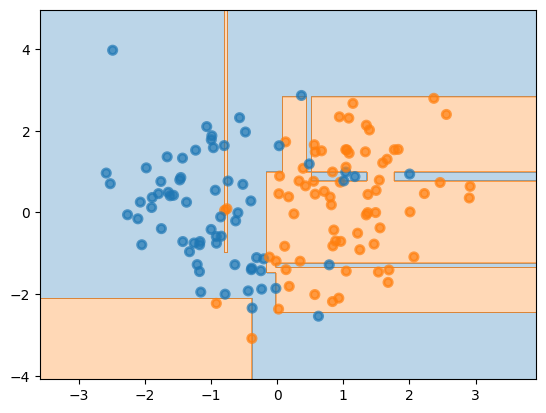

In [7]:
plot_surface(clf, X_train, y_train)

In [12]:
print(f"Accuracy test: {accuracy_score(y_test, clf.predict(X_test)):.1f}")
print(f"Accuracy train: {accuracy_score(y_train, clf.predict(X_train)):.1f}")

Accuracy test: 0.8
Accuracy train: 1.0


__Задание 2.__

Переберите несколько параметров для регуляризации (`max_depth`, `min_samples_leaf`) из предложенных. Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Используйте, если хотите, функцию ниже. Как изменение параметров влияет на поверхность? При каких параметрах на тесте достигается лучшее качество? А на трейне? (2б).

In [13]:
def plot_surface_axes(clf, X, y, ax, train_acc, test_acc):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
    edgecolors=np.array(palette)[y], linewidths=2)
    
    ax.plot([], [], label = 'train_acc : %0.5f' % train_acc)
    ax.plot([], [], label = 'test_acc : %0.5f' % test_acc)
    
    plt.legend(loc = 'lower right', prop={'size': 20})

In [14]:
max_depth_set = [6, 7, 8, 9, 12]

min_samples_leaf_set = [3, 5, 7, 10]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state = 42) 

In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': max_depth_set, 'min_samples_leaf': min_samples_leaf_set}

for max_depth in max_depth_set:
    for min_samples_leaf in min_samples_leaf_set:
        clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
        clf.fit(X_train, y_train)
        train_acc = accuracy_score(y_train, clf.predict(X_train))
        test_acc = accuracy_score(y_test, clf.predict(X_test))
        print(f"max_depth: {max_depth}, min_samples_leaf: {min_samples_leaf}, train_acc: {train_acc:.5f}, test_acc: {test_acc:.5f}")



max_depth: 6, min_samples_leaf: 3, train_acc: 0.94375, test_acc: 0.80000
max_depth: 6, min_samples_leaf: 5, train_acc: 0.92500, test_acc: 0.80000
max_depth: 6, min_samples_leaf: 7, train_acc: 0.91250, test_acc: 0.80000
max_depth: 6, min_samples_leaf: 10, train_acc: 0.90000, test_acc: 0.80000
max_depth: 7, min_samples_leaf: 3, train_acc: 0.94375, test_acc: 0.80000
max_depth: 7, min_samples_leaf: 5, train_acc: 0.92500, test_acc: 0.80000
max_depth: 7, min_samples_leaf: 7, train_acc: 0.91250, test_acc: 0.80000
max_depth: 7, min_samples_leaf: 10, train_acc: 0.90000, test_acc: 0.80000
max_depth: 8, min_samples_leaf: 3, train_acc: 0.94375, test_acc: 0.80000
max_depth: 8, min_samples_leaf: 5, train_acc: 0.92500, test_acc: 0.80000
max_depth: 8, min_samples_leaf: 7, train_acc: 0.91250, test_acc: 0.80000
max_depth: 8, min_samples_leaf: 10, train_acc: 0.90000, test_acc: 0.80000
max_depth: 9, min_samples_leaf: 3, train_acc: 0.94375, test_acc: 0.80000
max_depth: 9, min_samples_leaf: 5, train_acc: 0.

In [16]:
grid = GridSearchCV(DecisionTreeClassifier(), param_grid)
grid.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [6, 7, 8, 9, 12],
                         'min_samples_leaf': [3, 5, 7, 10]})

In [17]:
grid.best_params_

{'max_depth': 6, 'min_samples_leaf': 5}

__Задание 3.__

Добавим признак $2\cdot x_1 - x_2$, транформацию добавим как шаг пайплайна. С помощью данного класса (из практики/лекции) обучите дерево с максимальной глубиной=3, нарисуйте поверхность на трейне, посчитайте accuracy (2 б)

In [19]:
from sklearn.base import BaseEstimator, TransformerMixin

class CustomFunctionTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, first_col, second_col, function):
        self.first_col = first_col
        self.second_col = second_col
        self.function = function
        print("Инициализировали класс!")
        
    def fit(self, X, y=None):
        print("Зафитили датасет!")
        return self
    
    def transform(self, X, y=None):
        
        X_ = X.copy()
        X_['new_feature'] = self.function(X_[self.first_col], X_[self.second_col])
        X_ = X_.drop([self.first_col, self.second_col], axis=1)
        
        print("Трансформировали датасет!")
        return X_

In [20]:
X_train = pd.DataFrame(X_train, columns=['x1', 'x2'])
X_test = pd.DataFrame(X_test, columns=['x1', 'x2'])

In [22]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('transformer', CustomFunctionTransformer('x1', 'x2', lambda x1, x2: 2*x1 - x2)),
                 ('clf', DecisionTreeClassifier(max_depth=3))])


Инициализировали класс!


In [23]:
pipe.fit(X_train, y_train)

Зафитили датасет!
Трансформировали датасет!


Pipeline(steps=[('transformer',
                 CustomFunctionTransformer(first_col='x1',
                                           function=<function <lambda> at 0x1778e11c0>,
                                           second_col='x2')),
                ('clf', DecisionTreeClassifier(max_depth=3))])

In [27]:
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

Трансформировали датасет!
Трансформировали датасет!


(0.8625, 0.75)